In [1]:
!pip install openpyxl

# Importing libraries

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize': (15,13)})
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Importing dataset

In [3]:
Fintech = pd.read_excel('Fintech Stocks.xlsx', 
                       sheet_name='PayPal', index_col=0, engine='openpyxl')
Fintech.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-07-06,35.939999,36.169998,35.715000,35.930000,35.930000,7821300
2016-07-07,35.919998,36.389999,35.840000,36.320000,36.320000,7326700
2016-07-08,36.779999,37.459999,36.660000,37.360001,37.360001,6828600
2016-07-11,37.450001,38.330002,37.400002,38.150002,38.150002,10096200
2016-07-12,38.470001,38.910000,38.240002,38.790001,38.790001,9997200


In [4]:
Fintech.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-07-06 to 2021-07-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [5]:
Fintech.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,110.970986,112.414044,109.391886,111.000095,111.000095,8.098847e+06
std,66.521580,67.517192,65.290250,66.498864,66.498864,4.054417e+06
min,35.919998,36.169998,35.715000,35.930000,35.930000,1.680000e+06
25%,64.550001,65.150002,64.102499,64.824999,64.824999,5.644775e+06
50%,90.334999,91.310001,89.475003,90.575001,90.575001,7.179200e+06
75%,119.554998,120.712500,118.582498,119.717500,119.717500,9.354500e+06
max,306.399994,309.140015,298.179993,304.790009,304.790009,4.427160e+07


In [6]:
Fintech['daily_mean'] = (Fintech.iloc[:, 1:5].sum(axis=1))/4
Fintech

,Open,High,Low,Close,Adj Close,Volume,daily_mean
Date,,,,,,,
2016-07-06,35.939999,36.169998,35.715000,35.930000,35.930000,7821300,35.936250
2016-07-07,35.919998,36.389999,35.840000,36.320000,36.320000,7326700,36.217500
2016-07-08,36.779999,37.459999,36.660000,37.360001,37.360001,6828600,37.210000
2016-07-11,37.450001,38.330002,37.400002,38.150002,38.150002,10096200,38.007502
2016-07-12,38.470001,38.910000,38.240002,38.790001,38.790001,9997200,38.682501
...,...,...,...,...,...,...,...
2021-06-28,290.850006,294.260010,289.779999,293.649994,293.649994,5058600,292.834999
2021-06-29,292.970001,295.179993,291.529999,292.760010,292.760010,4333200,293.057503
2021-06-30,291.529999,292.700012,289.510010,291.480011,291.480011,4236000,291.292511


In [7]:
Fintech['dail_ var'] = ((Fintech['Adj Close']-Fintech['daily_mean'])**2)/(len(Fintech.index)-1)
Fintech['daily_std'] = np.sqrt(Fintech['dail_ var'])
Fintech

,Open,High,Low,Close,Adj Close,Volume,daily_mean,dail_ var,daily_std
Date,,,,,,,,,
2016-07-06,35.939999,36.169998,35.715000,35.930000,35.930000,7821300,35.936250,3.107100e-08,0.000176
2016-07-07,35.919998,36.389999,35.840000,36.320000,36.320000,7326700,36.217500,8.358235e-06,0.002891
2016-07-08,36.779999,37.459999,36.660000,37.360001,37.360001,6828600,37.210000,1.789994e-05,0.004231
2016-07-11,37.450001,38.330002,37.400002,38.150002,38.150002,10096200,38.007502,1.615453e-05,0.004019
2016-07-12,38.470001,38.910000,38.240002,38.790001,38.790001,9997200,38.682501,9.193516e-06,0.003032
...,...,...,...,...,...,...,...,...,...
2021-06-28,290.850006,294.260010,289.779999,293.649994,293.649994,5058600,292.834999,5.284140e-04,0.022987
2021-06-29,292.970001,295.179993,291.529999,292.760010,292.760010,4333200,293.057503,7.040739e-05,0.008391
2021-06-30,291.529999,292.700012,289.510010,291.480011,291.480011,4236000,291.292511,2.796838e-05,0.005289


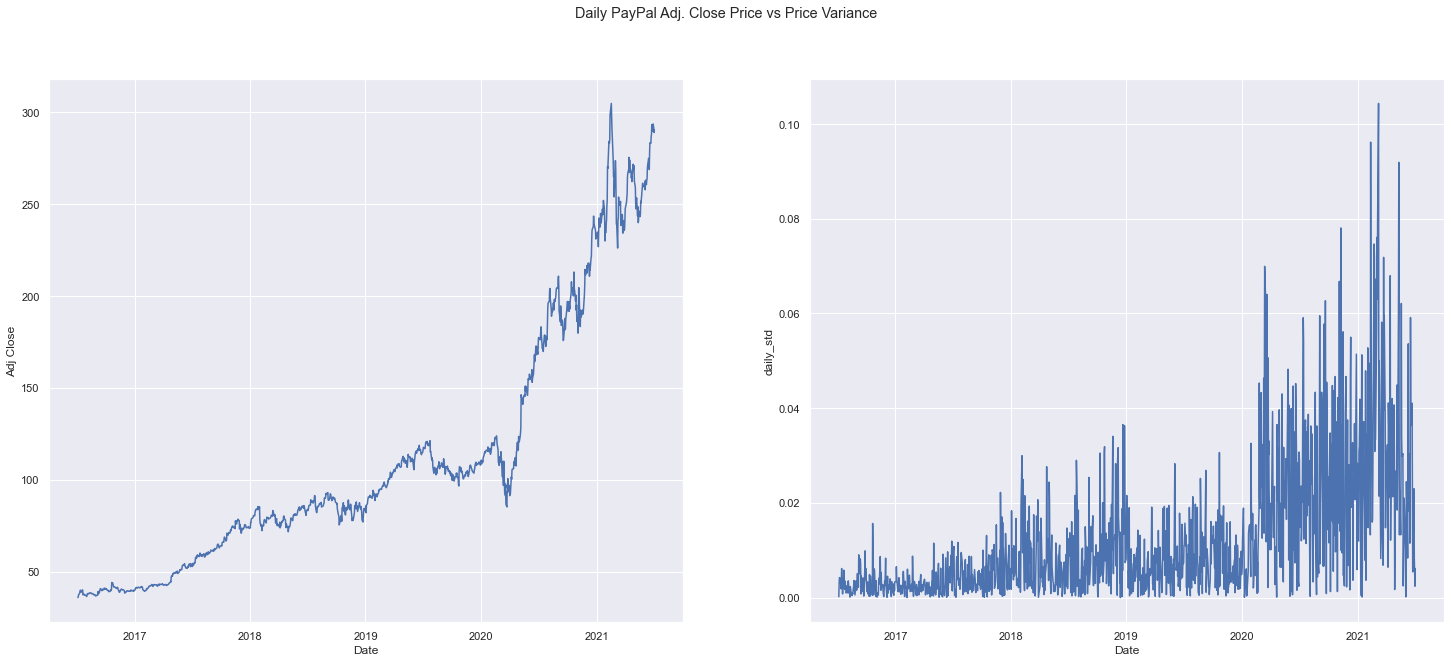

In [8]:
fig = plt.figure(figsize=(25, 10))
gs = fig.add_gridspec(1, 2, hspace=0.2, wspace=0.2)
(ax1, ax2) = gs.subplots(sharex=False, sharey=False)
fig.suptitle(' Daily PayPal Adj. Close Price vs Price Variance')

sns.lineplot(ax=ax1, data=Fintech, x = 'Date', y='Adj Close')
sns.lineplot(ax=ax2, data=Fintech, x = 'Date', y='daily_std')
plt.show()

In [9]:
affirm = pd.read_excel('Fintech Stocks.xlsx', 
                       sheet_name='Affirm', index_col=0, engine='openpyxl')
coinbase = pd.read_excel('Fintech Stocks.xlsx', 
                       sheet_name='Coinbase', index_col=0, engine='openpyxl')
fiserv = pd.read_excel('Fintech Stocks.xlsx', 
                       sheet_name='Fiserv', index_col=0, engine='openpyxl')
square = pd.read_excel('Fintech Stocks.xlsx', 
                       sheet_name='Square', index_col=0, engine='openpyxl')

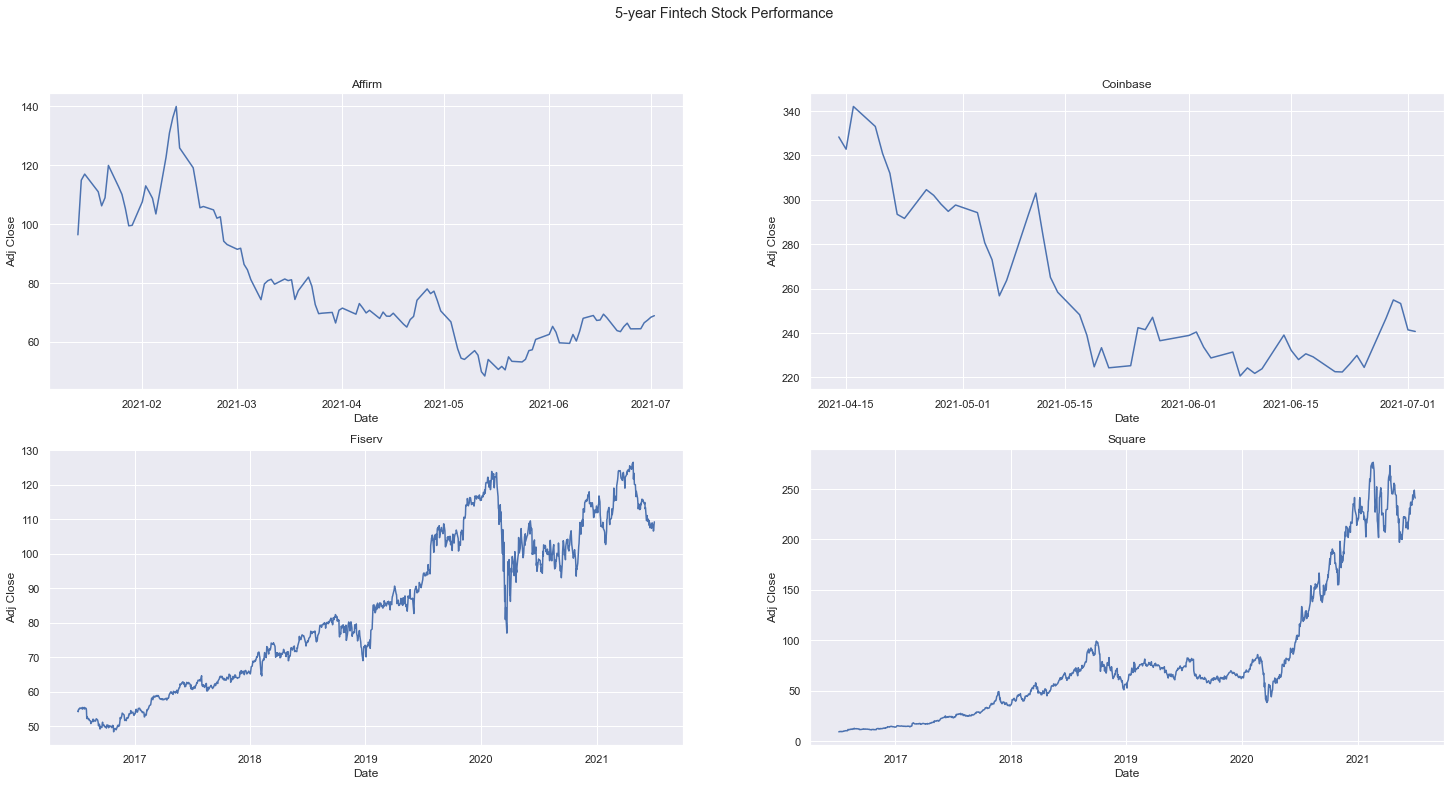

In [10]:
fig = plt.figure(figsize=(25, 12))
gs = fig.add_gridspec(2, 2, hspace=0.2, wspace=0.2)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex=False, sharey=False)
fig.suptitle('5-year Fintech Stock Performance')

sns.lineplot(ax=ax1, data=affirm, x = 'Date', y='Adj Close')
ax1.title.set_text('Affirm')
sns.lineplot(ax=ax2, data=coinbase, x = 'Date', y='Adj Close')
ax2.title.set_text('Coinbase')

sns.lineplot(ax=ax3, data=fiserv, x = 'Date', y='Adj Close')
ax3.title.set_text('Fiserv')

sns.lineplot(ax=ax4, data=square, x = 'Date', y='Adj Close')
ax4.title.set_text('Square')

plt.show()